# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

This is the salary prediction project; we predict the salary based on the job descriptions.
We are going to make a model.
If we obtain a new job description, we can predict the salary for this new job with using this model.

In [1]:
#import the libraries we use
import pandas as pd
import sklearn as sk
import numpy as np

#my info here
__author__ = "Tomo Shimo"
__email__ = "tomo.krmr@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
csv_path_1 = '~/Documents/Study/DSDJ/Instructions_and_Notebook/data/train_features.csv'
df_features = pd.read_csv(csv_path_1)
df_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [3]:
csv_path_2 = '~/Documents/Study/DSDJ/Instructions_and_Notebook/data/train_salaries.csv'
df_salaries = pd.read_csv(csv_path_2)
df_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


### ---- 3 Clean the data ----

In [4]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
print(df_features.isna().sum())

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [5]:
df_salaries.query('salary <= 0')

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [6]:
df_salaries_mod = df_salaries.query('salary > 0')

In [7]:
df = pd.merge(df_salaries_mod, df_features, how="inner" ,on="jobId")

### ---- 4 Explore the data (EDA) ----

## Numerical features

In [8]:
#summarize each feature variable
df.describe()

,salary,yearsExperience,milesFromMetropolis
count,999995.000000,999995.000000,999995.000000
mean,116.062398,11.992407,49.529381
std,38.717163,7.212390,28.877721
min,17.000000,0.000000,0.000000
25%,88.000000,6.000000,25.000000
50%,114.000000,12.000000,50.000000
75%,141.000000,18.000000,75.000000
max,301.000000,24.000000,99.000000


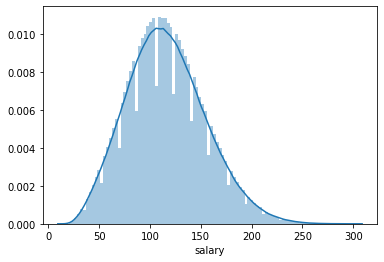

In [9]:
#summarize each feature variable
#summarize the target variable
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df_salaries_mod['salary'], 100,"salary", "Distribution of salary")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa1f666e10>,
      dtype=object)

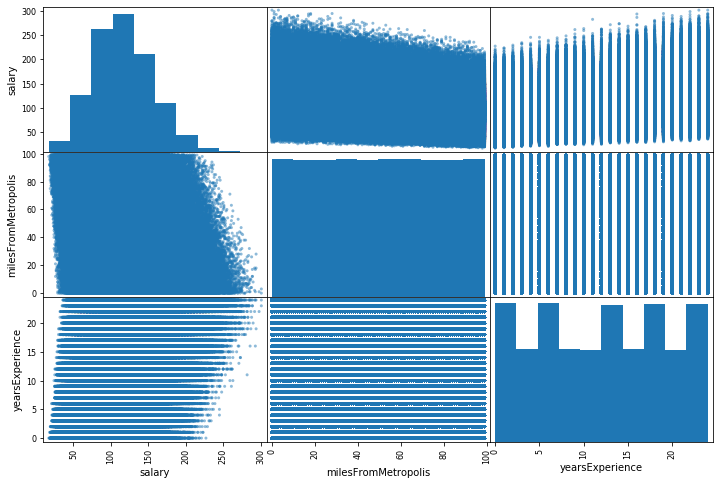

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["salary","milesFromMetropolis","yearsExperience"]
scatter_matrix(df[attributes], figsize=(12,8))

In [11]:
#look for correlation between each feature and the target
#look for correlation between features
df.corr()

,salary,yearsExperience,milesFromMetropolis
salary,1.000000,0.375013,-0.297686
yearsExperience,0.375013,1.000000,0.000672
milesFromMetropolis,-0.297686,0.000672,1.000000


From this correlation table, salary is positively correlated with years of experience and negatively correlated with miles from metropolis.

## Categorical features

Next, we are going to see how the categorical features affect to the salary.

### jobtype

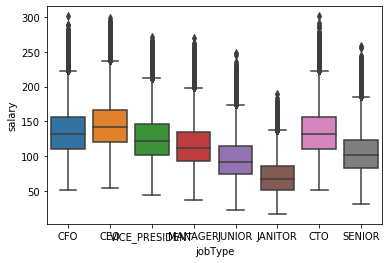

In [12]:
sns.boxplot(x="jobType", y="salary", data=df)

### degree

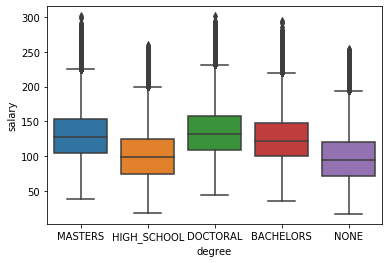

In [13]:
sns.boxplot(x="degree", y="salary", data=df)

### industry

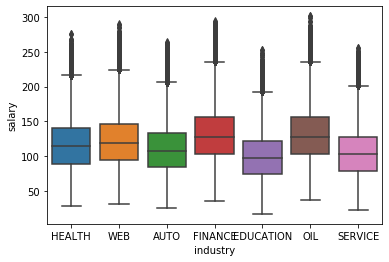

In [14]:
sns.boxplot(x="industry", y="salary", data=df)

### company id

There are many unique values in company id.

In [15]:
df['companyId'].describe()

count     999995
unique        63
top       COMP39
freq       16193
Name: companyId, dtype: object

### Order by the mean value in each category

To see the difference between each label in the same category, we make a graph in order by the mean value.

### jobtype

In [16]:
df_jobtype = df.groupby(['jobType'],as_index=False).mean()
df_jobtype

,jobType,salary,yearsExperience,milesFromMetropolis
0,CEO,145.311425,11.998269,49.478458
1,CFO,135.458547,11.990440,49.572715
2,CTO,135.481067,12.010860,49.580847
3,JANITOR,70.813045,11.969657,49.443815
4,JUNIOR,95.333087,11.992383,49.660508
5,MANAGER,115.368518,11.987284,49.498354
6,SENIOR,105.487775,11.996624,49.572558
7,VICE_PRESIDENT,125.368630,11.993700,49.428222


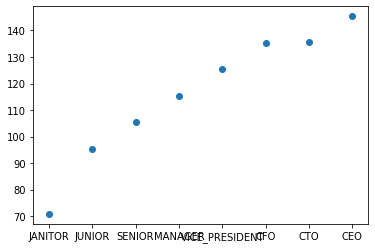

In [17]:
df_jobtype_sorted = df_jobtype.sort_values(by='salary')
plt.scatter(df_jobtype_sorted['jobType'],df_jobtype_sorted['salary'])

### degree

In [18]:
df_degree = df.groupby(['degree'],as_index=False).mean()
df_degree

,degree,salary,yearsExperience,milesFromMetropolis
0,BACHELORS,125.454663,11.986045,49.589646
1,DOCTORAL,135.490979,12.003279,49.609020
2,HIGH_SCHOOL,101.921085,11.995519,49.459310
3,MASTERS,130.505647,11.984987,49.554064
4,NONE,98.176882,11.991450,49.477600


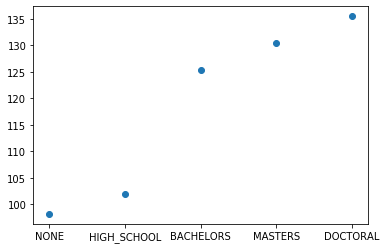

In [19]:
df_degree_sorted = df_degree.sort_values(by='salary')
plt.scatter(df_degree_sorted['degree'],df_degree_sorted['salary'])

### industry

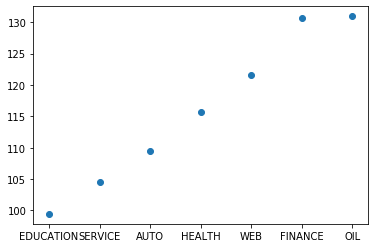

In [20]:
df_industry = df.groupby(['industry'],as_index=False).mean()
df_ind_sorted = df_industry.sort_values(by='salary')
plt.scatter(df_ind_sorted['industry'],df_ind_sorted['salary'])

In [21]:
df_ind_sorted['industry']

1    EDUCATION
5      SERVICE
0         AUTO
3       HEALTH
6          WEB
2      FINANCE
4          OIL
Name: industry, dtype: object

### major

In [22]:
df['major']

0              MATH
1              NONE
2           PHYSICS
3         CHEMISTRY
4           PHYSICS
            ...    
999990    CHEMISTRY
999991         NONE
999992         NONE
999993         NONE
999994         NONE
Name: major, Length: 999995, dtype: object

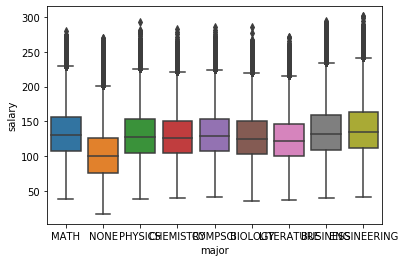

In [23]:
sns.boxplot(x="major", y="salary", data=df)

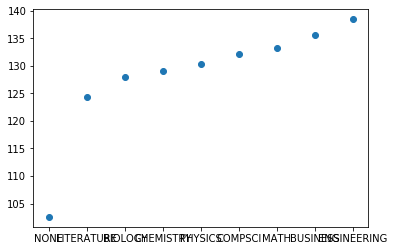

In [24]:
df_major = df.groupby(['major'],as_index=False).mean()
df_major_sorted = df_major.sort_values(by='salary')
plt.scatter(df_major_sorted['major'],df_major_sorted['salary'])

In [25]:
df_major_sorted['major']

7           NONE
5     LITERATURE
0        BIOLOGY
2      CHEMISTRY
8        PHYSICS
3        COMPSCI
6           MATH
1       BUSINESS
4    ENGINEERING
Name: major, dtype: object

In [26]:
print(len(df_major['major'] == "NONE"))

9


Now let's see the relationship between the jobtype and degree.

In [27]:
grouped_test1 = df.groupby(['jobType','degree'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='jobType',columns='degree')
grouped_pivot['salary']

degree,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE
jobType,,,,,
CEO,148.421009,158.232849,135.629182,153.254510,130.796690
CFO,138.508706,148.308742,125.964395,143.316243,121.135389
CTO,138.363172,148.269262,126.082232,143.582019,120.939193
JANITOR,NaN,NaN,70.976821,NaN,70.649575
JUNIOR,98.130267,108.356035,85.791986,103.463304,80.884064
MANAGER,118.173795,128.211800,106.068086,123.389176,100.981070
SENIOR,108.325539,118.867134,95.908637,113.408824,90.628738
VICE_PRESIDENT,128.196227,138.491400,115.758343,133.077062,111.207654


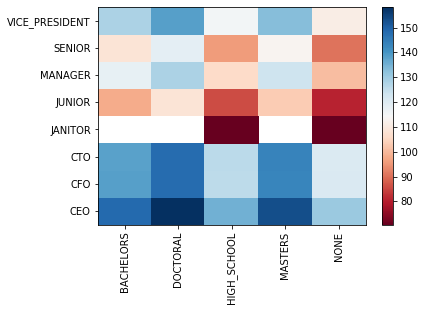

In [28]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot['salary'], cmap='RdBu')

#label names
row_labels = grouped_pivot['salary'].columns
col_labels = grouped_pivot['salary'].index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot['salary'].shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot['salary'].shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

It looks like no typical relationship between them.

Next, let's see the relationship between the jobtype and major.

In [29]:
grouped_test2 = df.groupby(['jobType','major'],as_index=False).mean()
grouped_pivot2 = grouped_test2.pivot(index='jobType',columns='major')
grouped_pivot2['salary']

major,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
jobType,,,,,,,,,
CEO,150.926273,158.532143,151.359351,154.864766,161.450760,147.303251,156.424772,135.019285,153.378811
CFO,141.007409,148.635337,142.025117,144.469856,151.962028,137.782555,145.532890,125.272393,143.207245
CTO,140.713955,148.044638,141.941086,145.131548,151.658217,137.066163,146.363081,125.358820,143.480062
JANITOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.813045,NaN
JUNIOR,100.662689,108.502700,101.723473,104.960541,111.307501,97.489962,106.217693,85.102551,103.265185
MANAGER,120.651605,128.233874,122.166586,124.679360,131.577487,116.761529,126.428692,105.322210,122.699763
SENIOR,110.628057,119.406469,112.464656,115.213126,121.240136,107.559342,116.055494,95.082839,113.446978
VICE_PRESIDENT,131.104973,138.329067,131.801589,134.490711,141.029169,127.653643,136.113320,115.303132,132.872443


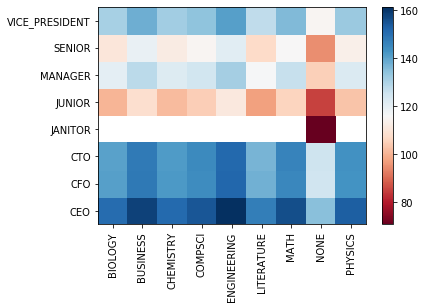

In [30]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2['salary'], cmap='RdBu')

#label names
row_labels = grouped_pivot2['salary'].columns
col_labels = grouped_pivot2['salary'].index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2['salary'].shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2['salary'].shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

There looks no relationship between them.

Let's see the trend of companyid now.

In [31]:
df['companyId'].describe()

count     999995
unique        63
top       COMP39
freq       16193
Name: companyId, dtype: object

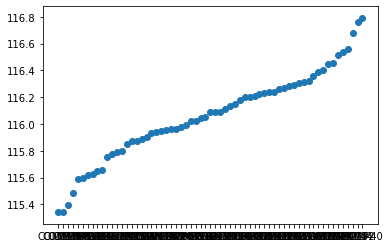

In [32]:
df_companies = df.groupby(['companyId'],as_index=False).mean()
df_companies_sorted = df_companies.sort_values(by='salary')
plt.scatter(df_companies_sorted['companyId'],df_companies_sorted['salary'])

## EDA Summary

Accoding to the means of categorical features, jobType and degrees are correlated with salary stronger than major and companyId.

### ---- 5 Establish a baseline ----

Aiming MSE < 360
At first, the salary considered to have a linear relationship with the years of experience.


In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['yearsExperience']],df['salary'])
print( "Salary = " + str(lm.coef_[0]) + " * yearsExperience + " + str(lm.intercept_))

Salary = 2.013126778161082 * yearsExperience + 91.9201627221139


In [34]:
y_hat = lm.coef_[0]* df[['yearsExperience']]+lm.intercept_
sk.metrics.mean_squared_error(y_hat,df['salary'])

1288.2028743217447

In [112]:
#during 5-fold cross-validation
Rcross = sk.model_selection.cross_val_score(lm,df[['yearsExperience']],df['salary'], cv=5, scoring='neg_mean_squared_error')
Rcross

array([-1290.34937908, -1288.17933147, -1294.64763667, -1286.80520688,
       -1281.07634491])

In [113]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -1288.2115798018676 and the standard deviation is 4.447100527861621


The MSE (Mean Squared Error) is 1288. 

### ---- 6 Hypothesize solution ----

## Model 1: Adding degree and jobtype as variables
I think the degree and jobtype are also the key to predict the salary. It's because the means of salary and degree depend on what they are.

I applied one-hot encoding to "jobType" and "degree".
Then I predict the relationship between salary with variables, which are years of experience, degree and jobtype.

## Model 2: Model1 + salary scaling
At first, scale saraly, then use model 1.
This is because the distribution of salary is skewed.

## Model 3: All the features without companyID
All the features without companyID are considered as linearly correlated with salary.

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

## Model 1

In [37]:
df_model1 = df[['salary','degree','jobType','yearsExperience']]

###  Transform categorical features into one-hot valiables

In [38]:
df_jobType_labels = df_model1[['jobType']]

In [59]:
# from sklearn.preprocessing import OneHotEncoder
    
# encoder = OneHotEncoder(categories="auto", sparse=False, dtype=np.float32)
df_jobType_1hot = df_model1.join(pd.get_dummies(df_jobType_labels))

In [60]:
df_jobType_1hot

,salary,degree,jobType,yearsExperience,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT
0,130,MASTERS,CFO,10,0,1,0,0,0,0,0,0
1,101,HIGH_SCHOOL,CEO,3,1,0,0,0,0,0,0,0
2,137,DOCTORAL,VICE_PRESIDENT,10,0,0,0,0,0,0,0,1
3,142,DOCTORAL,MANAGER,8,0,0,0,0,0,1,0,0
4,163,BACHELORS,VICE_PRESIDENT,8,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
999990,88,BACHELORS,VICE_PRESIDENT,19,0,0,0,0,0,0,0,1
999991,160,HIGH_SCHOOL,CTO,12,0,0,1,0,0,0,0,0
999992,64,HIGH_SCHOOL,JUNIOR,16,0,0,0,0,1,0,0,0
999993,149,MASTERS,CFO,6,0,1,0,0,0,0,0,0


In [61]:
df_jobType_1hot = df_jobType_1hot.drop("jobType", axis=1)

In [62]:
df_degree_labels = df_model1[['degree']]

In [64]:
df_degree_1hot = df_jobType_1hot.join(pd.get_dummies(df_degree_labels))
df_degree_1hot = df_degree_1hot.drop("degree", axis=1)

In [65]:
target_model1 = df_degree_1hot['salary']
features_model1 = df_degree_1hot.drop("salary", axis=1)

In [66]:
target_model1

0         130
1         101
2         137
3         142
4         163
         ... 
999990     88
999991    160
999992     64
999993    149
999994     88
Name: salary, Length: 999995, dtype: int64

In [67]:
features_model1

,yearsExperience,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE
0,10,0,1,0,0,0,0,0,0,0,0,0,1,0
1,3,1,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,0,0,0,0,0,0,1,0,1,0,0,0
3,8,0,0,0,0,0,1,0,0,0,1,0,0,0
4,8,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,0,1,0,0
999992,16,0,0,0,0,1,0,0,0,0,0,1,0,0
999993,6,0,1,0,0,0,0,0,0,0,0,0,1,0


## Model 2

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
target_model2 = scaler.fit_transform(df_degree_1hot[['salary']])

In [70]:
target_model2

array([[ 0.35998527],
       [-0.38903692],
       [ 0.54078373],
       ...,
       [-1.34468592],
       [ 0.85072395],
       [-0.72480548]])

In [71]:
target_model2_inv = scaler.inverse_transform(target_model2)
target_model2_inv

array([[130.],
       [101.],
       [137.],
       ...,
       [ 64.],
       [149.],
       [ 88.]])

In [72]:
scaler.mean_

array([116.06239831])

In [73]:
scaler.scale_

array([38.71714403])

In [74]:
target_model2_df = pd.DataFrame(target_model2, index=df.index)
target_model2_df

,0
0,0.359985
1,-0.389037
2,0.540784
3,0.669925
4,1.212321
...,...
999990,-0.724805
999991,1.134836
999992,-1.344686
999993,0.850724


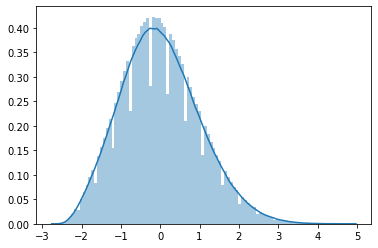

In [75]:
sns.distplot(target_model2_df, 100,"salary", "Distribution of salary")

mean = 0, std_dev = 1.0
=> outlier 1.5*2=3.0

In [76]:
print(len(target_model2[target_model2_df[0] > 3.0]))

3212


In [77]:
scaler.inverse_transform([3.0])

array([232.21383039])

Confirm how much is the mse between standarized one and original one

In [78]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(target_model1, target_model2_inv)
mse_test

9.26796290758549e-31

## Model 3

In [79]:
features_model3 = features_model1.join(df[['milesFromMetropolis']])

### Transform categorical features into one-hot valiables

In [80]:
df_industry_labels = df[['industry']]
df_industry_labels

,industry
0,HEALTH
1,WEB
2,HEALTH
3,AUTO
4,FINANCE
...,...
999990,HEALTH
999991,FINANCE
999992,EDUCATION
999993,HEALTH


In [81]:
df_jobType_1hot = df_model1.join(pd.get_dummies(df_jobType_labels))
features_model3 = features_model3.join(pd.get_dummies(df_industry_labels))
features_model3

,yearsExperience,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,...,degree_MASTERS,degree_NONE,milesFromMetropolis,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,0,1,0,0,0,0,0,0,0,...,1,0,83,0,0,0,1,0,0,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,73,0,0,0,0,0,0,1
2,10,0,0,0,0,0,0,0,1,0,...,0,0,38,0,0,0,1,0,0,0
3,8,0,0,0,0,0,1,0,0,0,...,0,0,17,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,16,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,94,0,0,0,1,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,35,0,0,1,0,0,0,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,81,0,1,0,0,0,0,0
999993,6,0,1,0,0,0,0,0,0,0,...,1,0,5,0,0,0,1,0,0,0


In [82]:
df_major_labels = df[['major']]

In [66]:
# features_model3 = features_model3.rename(columns={"NONE":"NONE_DEG"})

In [83]:
features_model3 = features_model3.join(pd.get_dummies(df_major_labels))
features_model3

,yearsExperience,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,...,industry_WEB,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Replace the categorical values with order by mean salary

In [84]:
df_model3_rev = df [["major","industry", "jobType","degree",'yearsExperience','milesFromMetropolis']]

In [85]:
df_model3_rev['degree']=df_model3_rev['degree'].map({"NONE":0, "HIGH_SCHOOL":1, "BACHELORS":2, "MASTERS":3, "DOCTORAL":4 })

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
df_model3_rev['jobType']=df_model3_rev['jobType'].map({'JANITOR':0,  'JUNIOR':1, 'SENIOR':2, 'MANAGER':3, 'VICE_PRESIDENT':4, 'CFO':5, 'CTO':6,  'CEO':7 })

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_model3_rev['major']=df_model3_rev['major'].map({ 'NONE':0,'LITERATURE':1, 'BIOLOGY':2, 'CHEMISTRY':3, 'PHYSICS':4, 'COMPSCI':5, 'MATH':6, 'BUSINESS':7, 'ENGINEERING':8})

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
df_model3_rev['industry']=df_model3_rev['industry'].map({ 
'EDUCATION':0,
'SERVICE':1,
  'AUTO':2,
'HEALTH':3,
'WEB':4,
 'FINANCE':5,
 'OIL':6})

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
print(df_model3_rev.isna().sum())

major                  0
industry               0
jobType                0
degree                 0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


## For Tuning Model 3

### dropping degree=none -> didn't work well

In [71]:
# features_model4 = features_model3.drop("NONE_DEG", axis=1)

### categorized companyId by mean salary -> didn't work well

In [ ]:
df_companies_sorted

In [ ]:
sns.distplot(df_companies_sorted['salary'], 20,"salary", "Distribution of salary")

In [ ]:
df_companies_sorted["comp_cat"] = np.ceil(df_companies_sorted["salary"]/0.5)

In [ ]:
df_companies_sorted

In [ ]:
df_companies_sorted["comp_cat"].describe()

In [ ]:
df_companies_sorted["comp_cat"]

In [ ]:
features_model5 = features_model4.join(df["companyId"])
features_model5

In [ ]:
comp_dict = df_companies_sorted[["companyId","comp_cat"]]
comp_dict

In [ ]:
comp_dict = comp_dict.set_index('companyId')

In [ ]:
comp_dict.to_dict()

In [ ]:
companyId_mapped = features_model5["companyId"].map(comp_dict["comp_cat"])
companyId_mapped

In [ ]:
features_model5 = features_model5.rename(columns={"companyId":"companyId_"})
features_model5 = features_model5.join(companyId_mapped)
features_model5 = features_model5.drop("companyId_", axis=1)
features_model5

### replace companyId by its mean salary -> didn't work well

In [ ]:
comp_sal_dict = df_companies_sorted[["companyId","salary"]]
comp_sal_dict

In [ ]:
comp_sal_dict = comp_sal_dict.set_index('companyId')
comp_sal_dict

In [ ]:
comp_sal_dict.to_dict()

In [ ]:
features_model6 = features_model4.join(df["companyId"])
features_model6

In [ ]:
companyId_sal_mapped = features_model6["companyId"].map(comp_sal_dict["salary"])
companyId_sal_mapped

In [ ]:
features_model6 = features_model6.rename(columns={"companyId":"companyId_"})
features_model6 = features_model6.join(companyId_sal_mapped)
features_model6 = features_model6.drop("companyId_", axis=1)
features_model6

### Replace the categorical value to its mean salary

### ---- 8 Create models ----

## Model 1

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(features_model1, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
some_data = features_model1.iloc[:5]

In [92]:
some_labels=target_model1.iloc[:5]

In [93]:
print("Predictions:\t",lin_reg.predict(some_data))

Predictions:	 [139.4543457  117.06103516 134.34387207 120.3515625  120.26818848]


In [94]:
print("Labels:\t\t",list(some_labels))

Labels:		 [130, 101, 137, 142, 163]


In [116]:

model1_predictions = lin_reg.predict(features_model1)
# lin_mse = mean_squared_error(target_model1, model1_predictions)
# lin_mse
Rcross_model1 = sk.model_selection.cross_val_score(lin_reg,features_model1, target_model1, cv=5, scoring='neg_mean_squared_error')

In [115]:
print("The mean of the folds are", Rcross_model1.mean(), "and the standard deviation is" , Rcross_model1.std())

The mean of the folds are -659.8264112988913 and the standard deviation is 3.0067272708781574


## Model 2

In [96]:
lin_reg2 = LinearRegression()
lin_reg2.fit(features_model1, target_model2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
model2_predictions = lin_reg2.predict(features_model1)
model2_predictions_inv = scaler.inverse_transform(model2_predictions)
# lin_mse2 = mean_squared_error(target_model1, model2_predictions_inv)
# lin_mse2
Rcross_model2 = sk.model_selection.cross_val_score(lin_reg2,features_model1, target_model2, cv=5, scoring='neg_mean_squared_error')
print("The mean of the folds are", Rcross_model2.mean(), "and the standard deviation is" , Rcross_model2.std())

The mean of the folds are -0.4401726695028006 and the standard deviation is 0.0020058199870379516


In [98]:
model2_predictions

array([[ 0.60417938],
       [ 0.02579498],
       [ 0.47218704],
       ...,
       [-0.58901215],
       [ 0.39651489],
       [-0.04396439]])

In [99]:
model2_predictions_inv 

array([[139.45449848],
       [117.06110638],
       [134.34413203],
       ...,
       [ 93.25753022],
       [131.41432252],
       [114.36022285]])

## Model 3

In [100]:
lin_reg3 = LinearRegression()
lin_reg3.fit(features_model3, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
model3_predictions = lin_reg3.predict(features_model3)
lin_mse3 = mean_squared_error(target_model1, model3_predictions)
lin_mse3

384.38026432578107

The MSE of model 3 is now 384. This is the best score.

In [102]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(target_model1, model3_predictions)
mae

15.843779757568374

In [103]:
np.sqrt(lin_mse3)/mae

1.237433143018397

In [104]:
features_model3["MFM_buc"] = features_model3["milesFromMetropolis"] // 20

In [105]:
features_model3[["milesFromMetropolis","MFM_buc"]].head()

,milesFromMetropolis,MFM_buc
0,83,4
1,73,3
2,38,1
3,17,0
4,16,0


In [106]:
features_model3_1 = features_model3.drop("milesFromMetropolis", axis=1)
lin_reg3_1 = LinearRegression()
lin_reg3_1.fit(features_model3_1, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
model3_1_predictions = lin_reg3_1.predict(features_model3_1)
lin_mse3_1 = mean_squared_error(target_model1, model3_1_predictions)
lin_mse3_1

389.5912504980699

## For Tuning Model 3

In [ ]:
lin_reg4 = LinearRegression()
lin_reg4.fit(features_model4, target_model1)

In [ ]:
model4_predictions = lin_reg4.predict(features_model4)
lin_mse4 = mean_squared_error(target_model1, model4_predictions)
lin_mse4

In [ ]:
lin_reg5 = LinearRegression()
lin_reg5.fit(features_model5, target_model1)

In [ ]:
model5_predictions = lin_reg5.predict(features_model5)
lin_mse5 = mean_squared_error(target_model1, model5_predictions)
lin_mse5

In [ ]:
lin_reg6 = LinearRegression()
lin_reg6.fit(features_model6, target_model1)

In [ ]:
model6_predictions = lin_reg6.predict(features_model6)
lin_mse6 = mean_squared_error(target_model1, model6_predictions)
lin_mse6

In [ ]:
lin_reg8 = LinearRegression()
lin_reg8.fit(features_model8, target_model1)

In [ ]:
model8_predictions = lin_reg8.predict(features_model8)
lin_mse8 = mean_squared_error(target_model1, model8_predictions)
lin_mse8

In [78]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(features_model3, target_model1)
en_predictions = elastic_net.predict(features_model3)

In [79]:
en_mse = mean_squared_error(target_model1, en_predictions)
en_mse

434.43596425995804

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_model3_scaled = scaler.fit_transform(features_model3)

In [83]:
lin_reg8 = LinearRegression()
lin_reg8.fit(features_model3_scaled, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
model8_predictions = lin_reg8.predict(features_model3_scaled)
lin_mse8 = mean_squared_error(target_model1, model8_predictions)
lin_mse8

384.380541447852

In [75]:
model3_predictions_sort = sorted(model3_predictions)
model3_predictions_sort

[8.608448028564453,
 8.608448028564453,
 8.608448028564453,
 9.007976531982422,
 9.007976531982422,
 9.007976531982422,
 9.007976531982422,
 9.407503128051758,
 9.407503128051758,
 9.807031631469727,
 9.807031631469727,
 9.807031631469727,
 9.807031631469727,
 9.807031631469727,
 10.206560134887695,
 10.206560134887695,
 10.206560134887695,
 10.206560134887695,
 10.606088638305664,
 10.606088638305664,
 10.618515014648438,
 10.618515014648438,
 10.618515014648438,
 10.618515014648438,
 10.618515014648438,
 11.005617141723633,
 11.005617141723633,
 11.005617141723633,
 11.005617141723633,
 11.005617141723633,
 11.018043518066406,
 11.018043518066406,
 11.018043518066406,
 11.018043518066406,
 11.018043518066406,
 11.405143737792969,
 11.405143737792969,
 11.405143737792969,
 11.405143737792969,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.804672241210938,
 11.804672241210938,
 11.804672241210938,
 11.80

In [76]:
import numpy
sort_index = numpy.argsort(model3_predictions)
target_model1_sorted = []
for i in sort_index:
    target_model1_sorted.append(target_model1)

In [133]:
len(model3_predictions_sort)

999995

In [ ]:
model3_residual =[]
for j in range(len(model3_predictions_sort)):
    model3_residual.append(model3_predictions_sort[j] - target_model1_sorted[j])

In [ ]:
plt.plot(model3_residual)

### Removing outliers -> didn't work well

In [362]:
df_model3_mod = features_model3.join(target_model1)
df_model3_mod = df_model3_mod [df_model3_mod['salary']<232.1]

In [363]:
target_model3_mod = df_model3_mod['salary']
features_model3_mod = df_model3_mod.drop("salary",axis=1)

In [369]:
features_model3_mod

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [401]:
lin_reg7 = LinearRegression()
lin_reg7.fit(features_model3_mod, target_model3_mod)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
model7_predictions = lin_reg7.predict(features_model3)
lin_mse7 = mean_squared_error(target_model1, model7_predictions)
lin_mse7

384.6223952427876

In [443]:
lin_reg9= LinearRegression()
lin_reg9.fit(df_model3_rev, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [445]:
model9_predictions = lin_reg9.predict(df_model3_rev)
lin_mse9 = mean_squared_error(target_model1, model9_predictions)
lin_mse9

397.0924202873576

## Random Forest

In [323]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(features_model3, target_model1)
predictions_model3_random = forest_reg.predict(features_model3)
forest_mse = mean_squared_error(target_model1, predictions_model3_random)

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [324]:
forest_mse

134.95122092262267

In [375]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(forest_mse)

Scores: 134.95122092262267
Mean: 134.95122092262267
Standard deviation: 0.0


### Stochastic Gradient Descent

In [87]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None ,eta0=0.1)
sgd_reg.fit(features_model3_scaled,target_model1)

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [89]:
predictions_model3_sgd = sgd_reg.predict(features_model3_scaled)
sgd_mse = mean_squared_error(target_model1, predictions_model3_sgd)
sgd_mse

389.4430739941548

## SVR

In [90]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(features_model3_scaled,target_model1)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [93]:
predictions_model3_svr = svm_reg.predict(features_model3_scaled)
svr_mse = mean_squared_error(target_model1, predictions_model3_svr)
svr_mse

385.5129823946531

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

In [405]:
Rcross3 = sk.model_selection.cross_val_score(lin_reg3,features_model3,target_model1, cv=5,scoring='neg_mean_squared_error')
Rcross3

array([-386.30917173, -385.19183317, -385.99246987, -382.57079642,
       -382.00745833])

In [372]:
display_scores(Rcross3)

Scores: [0.74292573 0.74358062 0.74314533 0.74396891 0.74415407]
Mean: 0.7435549329385215
Standard deviation: 0.0004679036282042437


In [327]:
Rcross3_random = sk.model_selection.cross_val_score(forest_reg,features_model3,target_model1, cv=5)
Rcross3_random

array([0.68816648, 0.68870888, 0.68820546, 0.68795427, 0.68855794])

In [ ]:
Rcross3_random_mse = sk.model_selection.cross_val_score(forest_reg,features_model3,target_model1, cv=5,scoring='neg_mean_squared_error')
Rcross3_random_mse

In [373]:
display_scores(Rcross3_random)

Scores: [0.68816648 0.68870888 0.68820546 0.68795427 0.68855794]
Mean: 0.68831860765828
Standard deviation: 0.0002750546056104389


In [368]:
Rcross7 = sk.model_selection.cross_val_score(lin_reg7,features_model3,target_model1, cv=5)
Rcross7

array([0.74292573, 0.74358062, 0.74314533, 0.74396891, 0.74415407])

In [226]:
# Caluculate MSE
y_hat_model3=lin_reg3.predict(features_model3)

sk.metrics.mean_squared_error(y_hat_model3,target_model1)

384.38026432578107

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data